In [47]:
import numpy as np 
import matplotlib.pyplot as plt 

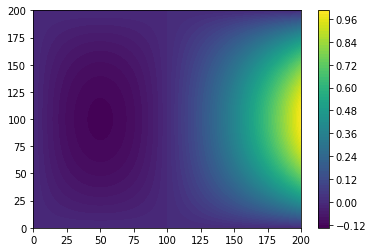

In [48]:
dx = 0.01
xx,zz = np.meshgrid(np.arange(0,3,1),np.arange(0,3,1))
xxhr,zzhr = np.meshgrid(np.arange(0,2+dx,dx),np.arange(0,2+dx,dx))
X = np.stack((xx.flatten(),zz.flatten()),axis=1)
Xhr = np.stack((xxhr.flatten(),zzhr.flatten()),axis=1)

poly_mat = np.zeros((9,9))
for j in range(0,9):
    poly_mat[j,0] = 1
    poly_mat[j,1] = X[j,0]
    poly_mat[j,2] = X[j,1]
    poly_mat[j,3] = X[j,0]**2
    poly_mat[j,4] = X[j,1]**2
    poly_mat[j,5] = X[j,0]*X[j,1]
    poly_mat[j,6] = X[j,0]**2*X[j,1]
    poly_mat[j,7] = X[j,1]**2*X[j,0]
    poly_mat[j,8] = X[j,0]**2*X[j,1]**2

weights = np.linalg.inv(poly_mat)
f = np.zeros((Xhr.shape[0],9))
for i in range(0,9):
    for j in range(0,Xhr.shape[0]):
        f[j,i] = weights[0,i] + weights[1,i]*Xhr[j,0] + weights[2,i]*Xhr[j,1] + weights[3,i]*Xhr[j,0]**2 + weights[4,i]*Xhr[j,1]**2
        f[j,i] += weights[5,i]*Xhr[j,0]*Xhr[j,1] + weights[6,i]*Xhr[j,0]**2*Xhr[j,1] + weights[7,i]*Xhr[j,0]*Xhr[j,1]**2 + weights[8,i]*Xhr[j,0]**2*Xhr[j,1]**2 

fstore = np.ndarray( (xxhr.shape[0],xxhr.shape[1],9))
for i in range(0,9):        
    fstore[:,:,i] = f[:,i].reshape((xxhr.shape[0],xxhr.shape[1]))
plt.contourf(fstore[:,:,5],levels=100)
Xhr.shape
plt.colorbar()



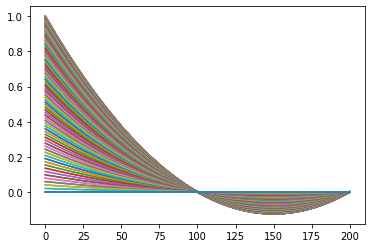

In [49]:
#plt.contourf(fstore[:,:,1])
plt.plot(fstore[:,:,1])

In [50]:
weights 
weights[:,0]

array([ 1.  , -1.5 , -1.5 ,  0.5 ,  0.5 ,  2.25, -0.75, -0.75,  0.25])

In [51]:
weights

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-1.5 ,  2.  , -0.5 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-1.5 ,  0.  ,  0.  ,  2.  ,  0.  ,  0.  , -0.5 ,  0.  ,  0.  ],
       [ 0.5 , -1.  ,  0.5 , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ],
       [ 0.5 , -0.  , -0.  , -1.  , -0.  , -0.  ,  0.5 , -0.  , -0.  ],
       [ 2.25, -3.  ,  0.75, -3.  ,  4.  , -1.  ,  0.75, -1.  ,  0.25],
       [-0.75,  1.5 , -0.75,  1.  , -2.  ,  1.  , -0.25,  0.5 , -0.25],
       [-0.75,  1.  , -0.25,  1.5 , -2.  ,  0.5 , -0.75,  1.  , -0.25],
       [ 0.25, -0.5 ,  0.25, -0.5 ,  1.  , -0.5 ,  0.25, -0.5 ,  0.25]])